X shape: (13067, 400)
y shape: (13067,)


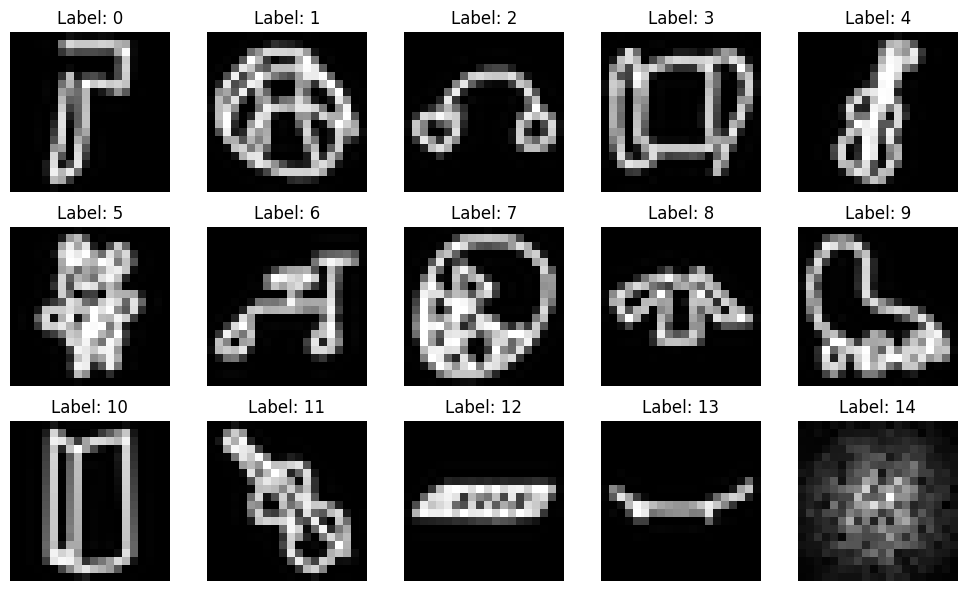

Antall klasser: 15
Fordeling: Counter({np.uint8(11): 1601, np.uint8(5): 1362, np.uint8(4): 1022, np.uint8(1): 900, np.uint8(8): 888, np.uint8(13): 884, np.uint8(14): 873, np.uint8(6): 858, np.uint8(9): 834, np.uint8(2): 804, np.uint8(10): 782, np.uint8(12): 702, np.uint8(7): 557, np.uint8(0): 546, np.uint8(3): 454})


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


data = np.load("dataset.npz")
X, y = data["X"], data["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)

unique_labels = np.unique(y)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))

for i, label in enumerate(unique_labels):
    idx = np.where(y == label)[0][0]
    ax = axes.flat[i]
    ax.imshow(X[idx].reshape(20, 20), cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

print("Antall klasser:", len(np.unique(y)))
print("Fordeling:", Counter(y))


In [ ]:
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("\n===== Logistic Regression =====")
print("Best parameters:", grid_lr.best_params_)
print("CV Accuracy:", grid_lr.best_score_)

y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
print("\n===== SVM =====")
print("Best parameters:", grid_svm.best_params_)
print("CV Accuracy:", grid_svm.best_score_)

y_pred_svm = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix – SVM (RBF)")
plt.show()

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression – test accuracy: {accuracy_lr:.3f}")
print(f"SVM (RBF kernel)   – test accuracy: {accuracy_svm:.3f}")